# Function for ploting predictions

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

import numpy as np

def plot_class(X, elements_to_plot_mask, cl, color, markers, legend):
    plt.scatter(x=X[elements_to_plot_mask, 2], y=X[elements_to_plot_mask, 3],
                    alpha=0.8, c=color,
                    marker=markers[cl], label=legend)

def plot(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('blue', 'red')
    cmap = ListedColormap(colors)

    predictions = classifier.predict(X)
    for idx, cl in enumerate(np.unique(y)):
        predictions_with_class = cl == predictions
        predictions_match_with_class = np.logical_and(y == cl, predictions_with_class)
        predictions_miss_with_class = np.logical_and(y == cl, np.logical_not(predictions_with_class))
        plot_class(X, predictions_match_with_class, cl, cmap(0),
                   markers, str(cl) + ' prediction match')
        plot_class(X, predictions_miss_with_class,
                   cl, cmap(1), markers, str(cl) + ' prediction miss')

        

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 2],
                    X_test[:, 3],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    edgecolors='k',
                    s=80, label='Tests set')

# Loading Iris dataset

In [3]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
pd.concat([X.head(), pd.DataFrame(iris.target_names[y], columns=['target class']).head()], axis='columns', join='inner')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Setting test and train sets of data

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0, stratify=y)

# Creating decision tree

Setting criteria as 'entropy'.

In [5]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

Build a decision tree classifier from the training set:

In [6]:
tree = tree.fit(X_train, y_train)
print('Decision tree accuracy', np.mean(tree.predict(X_test) == y_test))

Decision tree accuracy 0.95


Plot predictions:

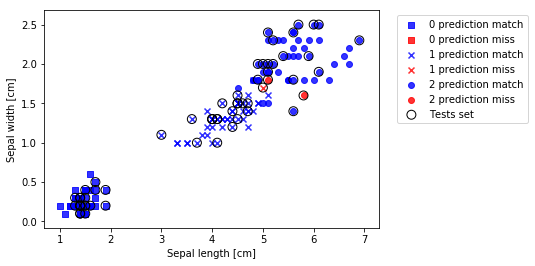

In [7]:
X_combined = np.vstack((X_train, X_test))
test_idx = range(X_train.shape[0], X_train.shape[0] + X_test.shape[0])
y_combined = np.hstack((y_train, y_test))
plot(X_combined, y_combined, classifier=tree, test_idx=test_idx)


plt.xlabel('Sepal length [cm]')
plt.ylabel('Sepal width [cm]')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

# Combining inefficient classifiers into efficient classifiers using a random forest model

Random forest accuracy  0.9833333333333333


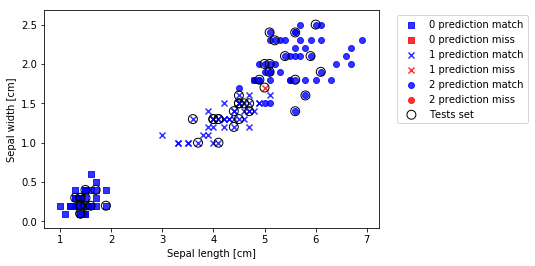

In [8]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=1, n_jobs=-1)

forest.fit(X_train, y_train)

print('Random forest accuracy ', np.mean(forest.predict(X_test) == y_test))


plot(X_combined, y_combined, classifier=forest, test_idx=range(105,150))

plt.xlabel('Sepal length [cm]')
plt.ylabel('Sepal width [cm]')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

In [9]:
forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

# Getting feature importances of our random forest

In [10]:
importances = forest.feature_importances_
columns = X_train.columns

for i in range(len(columns)):
    print(columns[i], ":\t", importances[i])

sepal length (cm) :	 0.1848704784549629
sepal width (cm) :	 0.048060089518597485
petal length (cm) :	 0.3843260993261729
petal width (cm) :	 0.38274333270026667
